In [1]:
%matplotlib nbagg
%load_ext line_profiler

In [2]:
import jefimenko
import numpy as np
import pdb
import mpld3
mpld3.enable_notebook()

Jefimenko version 0.0.1


In [3]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
%load_ext memory_profiler

In [5]:
C_0 = 299792458
K_e = 8.9875517873681764 * 10**9
E_0 = (4 * np.pi * K_e) ** -1
U_0 = (C_0 ** 2 * E_0) ** -1

In [6]:
def print_specs(mapping):
    
    for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
        jefimenko.plot_EM_grid('H', mapping, time=t)

    print('conductors')
    for i in range(len(mapping.conductors)):
            print(mapping.conductors[i].location)

    jefimenko.plot_grid(mapping)
    # for t in range(10):

    for t in range(len(mapping.currents)):
        if len(mapping.currents[t]) != 0:
            print('at time = ' + str(t))
            print('currents')
            for i in range(len(mapping.currents[t])):
                print(mapping.currents[t][i].amps)
                print(mapping.currents[t][i].direction)
                #if len(mapping.conductors) != 0:
                #    print(mapping.currents[t][mapping.conductors[0].current].amps)
                #    print(mapping.currents[t][mapping.conductors[0].current].direction)
            print('')
    
    for t in range(len(mapping.charges)):
        if len(mapping.charges[t]) != 0:
            print('charges at time = ' + str(t))
            print('charges')
            #for i in range(len(mapping.charges[t])):
            for i in range(len(mapping.charges[t])):
                print("the charge number is " + str(i))
                print(mapping.charges[t][i].Q)
            print('')
    
    for t in range(len(mapping.grid['E'])):
        print('at time = ' + str(t))
        print('the E field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['E'][t])
        print('')
        
    for t in range(len(mapping.grid['H'])):
        print('at time = ' + str(t))
        print('the H field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['H'][t])
        print('this makes the B field')
        print(U_0 * mapping.grid['H'][t])
        print('')
    print()
    
    #print(mapping.charges[0].location)
   # for t in range(len(mapping.grid['E'])):
   #     print("this should be the free charge")
   #     print(mapping.charges[t][0].Q)
    

    #for i in range(len(mapping.conductors)):
        #print("this is for conductor " + str(i))
        #print(mapping.conductors[i].charges)

In [7]:
def constant_field(print_all=False):
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[2,2,2],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                constant_E=[11,12,13],
                constant_H=[21,22,23]
        )
    E_pass = 0
    E_fail = 0
    H_pass = 0
    H_fail = 0

    jefimenko.simulate(mapping)
    for i in np.ndindex(tuple((3,2,2,2))):
        if (mapping.grid['E'][i] == [11, 12, 13]).all():
            E_pass += 1
        else:
            E_fail += 1
        if (mapping.grid['H'][i] == [21, 22, 23]).all():
            H_pass += 1
        else:
            H_fail += 1
    
    score = [E_pass, E_fail, H_pass, H_fail]
    return(score)


In [8]:
def test_charge_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
        )
    pass_count_E = 0
    pass_count_H = 0
    fail_count_E  = 0
    fail_count_H  = 0
 

    count = mapping.Add_Charge([0], Q = 1, count=True)
    
    if print_all is True:
        print("charge_count is " + str(count))

        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time = 0 R == 1 E field FAIL")
        fail_count_E = fail_count_E + 1

    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 H field FAIL")
        fail_count_H = Fail_count_H + 1

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1][0][0] - test_array < .01).all():
        if print_all == True:
            percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
            print("time == 1 R == 1 E filed PASS")
        pass_count_E = pass_count_E + 1
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        if print_all == True:
            print("time == 0 R == 1 E field FAIL")   
        fail_count_E = fail_count_E + 1

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2][0][0] - test_array < .01).all():
        if print_all == True:
            print("time == 1 R == 2 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 1 R == 2 E field FAIL")
            print(mapping.grid['E'][1][2][0][0])
        fail_count_E = fail_count_E + 1
        
    if(mapping.grid['H'][1][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 1 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 1 R == 1 H field FAIL")
        fail_count_H = fail_count_H + 1
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)
    
    return([pass_count_E, fail_count_E, pass_count_H, fail_count_H], mapping)

In [9]:
def test_current_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,1,1],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    H_pass = 0
    H_fail = 0
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)
                    #Amps=1/(np.linalg.norm(mapping.delta)))

    if print_all == True:
        jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        if print_all == True:
            print('amps = ' + str(mapping.currents[0][i].amps))
            print('direction = ' + str(mapping.currents[0][i].direction))
            print('location = '+ str(mapping.currents[0][i].location))
            print('')
    jefimenko.simulate(mapping)


    if print_all == True:
        print(' The H field is ')
        for t in range(int(mapping.time/mapping.delta_t)):
            # jefimenko.plot_grid(mapping, time = t)
            jefimenko.plot_EM_grid('H', mapping, time=t)
 
        print(' The E field is ')
        for t in range(int(mapping.time/mapping.delta_t)):
            # jefimenko.plot_grid(mapping, time = t)
            jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        H_pass = H_pass + 1
        if print_all == True:
            print("time == 0 PASS")
    else:
        if print_all == True:
            print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][1][1][0][0] - test_array) / (2*10**-7)) * 100)

    if percent <= 1:
        H_pass = H_pass + 1
        if print_all == True:
            print("time == 1 R == 1 PASS")
    else:
        H_fail = H_fail + 1
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][1][1][0][0])
        print('target is')
        print(test_array)
        print('')

    test_array = [0, 1*10**-7, 0]
    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][2][2][0][0] - test_array) / (1*10**-7)) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print(U_0 * mapping.grid['H'][2][2][0][0])   
        print('target is')
        print(test_array)
        print('')
        
    return([H_pass, H_fail])

In [10]:
def test_current_2(print_all=False):
    # time = 99
    time = 50
    #r = 10
    r = 50

    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z
                size=[r + 1, 1, 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0],
                    direction=[0, 1, 0],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    #jefimenko.plot_grid(mapping)

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w))

    #for t in range(len(mapping.currents)):
    #    for i in range(len(mapping.currents[t])):
    #        print('amps = ' + str(mapping.currents[t][i].amps))
    #        print('direction = ' + str(mapping.currents[t][i].direction))
    #        print('location = '+ str(mapping.currents[t][i].location))
    #        print('')

    jefimenko.simulate(mapping)

    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    #for t in range(mapping.time_size):
    ##for t in range(10):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    if print_all == True:
        jefimenko.plot_EM_grid('H', mapping, time=time-1)

    
    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2), 0 ]
            test_array_E_2 = [0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0), 0]
            
            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 0, - 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0)]
            test_array_H_2 = [0, 0, - scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r ]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r][0][0] - test_array_E) / np.linalg.norm(test_array_E)) * 100)
            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r][0][0] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1

            if percent_H <= 5:
                pass_count  = pass_count + 1

            else:
                fail_count = fail_count + 1
                if print_all == True:
                    
                    print('H_field')
                    print(str(mapping.grid['H'][test_time][test_r][0][0]))
                    print('target H_field')
                    print(str(test_array_H))
                    print('')

    if print_all == True:
        print('E field pass count = ' + str(pass_count_E))
        print('E field fail count = ' + str(fail_count_E))
    if print_all == True:
        if fail_count_E < 120:
            print('this is curently exseptable')
    
    if print_all == True:
        print() 
        print('H field pass count = ' + str(pass_count))
        print('H field fail count = ' + str(fail_count))
    if print_all == True:
        if fail_count < 120:
            print('this is curently exseptable')

    return([pass_count_E, fail_count_E, pass_count, fail_count])
    

In [11]:
def test_current_3(print_all=False):
    time = 50
    r = 50

    mapping = jefimenko.Grid(delta=[1],  # this is the size of a step in x, y and z
                size=[r + 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0 ,0 ,0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    if print_all == True:
        for i in range(len(mapping.currents[0])):
            print('amps = ' + str(mapping.currents[0][i].amps))
            print('direction = ' + str(mapping.currents[0][i].direction))
            print('location = '+ str(mapping.currents[0][i].location))
            print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=False)

    jefimenko.simulate(mapping)

    # jefimenko.plot_EM_grid('E', mapping, time=27)

    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0, 0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2)]
            test_array_E_2 = [0, 0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0)]

            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0), 0]
            test_array_H_2 = [0, scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r, 0]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r] - test_array_E) / np.linalg.norm(test_array_E)) * 100)

            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1
                if print_all == True:
                    print('test percent at time t = ' + str(t))
                    print(percent_E)
                    print('test_array = ' + str(test_array_E))
                    print(' true time = ' + str(t) + ' retarded time = ' + str(t_0))
                    print(mapping.grid['E'][t_0][5, 5])
                    print()


            if percent_H <= 5:
                pass_count  = pass_count + 1
            else:
                fail_count = fail_count + 1
                if print_all == True:
                    print('test percent at time t = ' + str(t))
                    print(percent_H)
                    print('test_array = ' + str(test_array_H))
                    print(' true time = ' + str(t) + ' retarded time = ' + str(test_time))
                    print('H field is = ' + str(mapping.grid['H'][test_time][test_r]))
                    print()

    if print_all == True:
        print('E field pass count = ' + str(pass_count_E))
        print('E fiels fail count = ' + str(fail_count_E))
    if print_all == True:
        if fail_count_E < 120:
            print('this is curently exseptable')

    if print_all == True:
        print()
 
        print('H field pass count = ' + str(pass_count))
        print('H field fail count = ' + str(fail_count))
    if print_all == True:
        if fail_count < 120:
            print('this is curently exseptable')
        else:
            print('there is room for improvment')
    
    return([pass_count_E, fail_count_E, pass_count, fail_count])

In [12]:
def test_current_4():
    time = 50
    r = 50 * .1

    mapping = jefimenko.Grid(delta=[.1],  # this is the size of a step in x, y and z
                             size=[r + 1],  # this is the size of the grid in meters
                             time=(time + 1) * 3.36 * 10**-9 * 10**-1,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9 * 10**-1
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time):# + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=True)

    jefimenko.simulate(mapping)
    
   # mapping = jefimenko.Grid(3,   # creat a 1D grid
   #             delta=[1, 1, 1],  # this is the size of a step in x, y and z
   #             size=[10, 1, 1],  # this is the size of the grid in meters
   #             time=10 * 3.36 * 10**-9 * 10**-1 ,  # this is the length of a simulation in secounds
   #             delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
   #     )
   # mapping.Add_Current([0, 0, 0],
   #                 direction=[0, 0, 1],
   #                 #Amps = 5)
   #                 Amps=5/(np.linalg.norm(mapping.delta)))
#
   # jefimenko.plot_grid(mapping)
#
   # U_0 = jefimenko.U_0
#
   # for i in range(len(mapping.currents[0])):
   #     print('amps = ' + str(mapping.currents[0][i].amps))
   #     print('direction = ' + str(mapping.currents[0][i].direction))
   #     print('location = '+ str(mapping.currents[0][i].location))
   #     print('')
   # jefimenko.simulate(mapping)

    return(mapping)

In [13]:
mapping = test_current_4()
# print_specs(mapping)

 grid size is [6.0, 1.0, 1.0]
recommended to give all three measurements
amps = 0.7053456158585983
direction = [0. 0. 1.]
location = [0. 0. 0.]

the time of modification is = 0
Modifying Current
New Time = 0
New Amps = 0.0
New direction = False
poresent direction = [0. 0. 1.]

the time of modification is = 1
Modifying Current
New Time = 1
New Amps = 2.111150263212341e-09
New direction = False
poresent direction = [0. 0. 1.]

the time of modification is = 2
Modifying Current
New Time = 2
New Amps = 4.222300526424682e-09
New direction = False
poresent direction = [0. 0. 1.]

the time of modification is = 3
Modifying Current
New Time = 3
New Amps = 6.3334507896370235e-09
New direction = False
poresent direction = [0. 0. 1.]

the time of modification is = 4
Modifying Current
New Time = 4
New Amps = 8.444601052849364e-09
New direction = False
poresent direction = [0. 0. 1.]

the time of modification is = 5
Modifying Current
New Time = 5
New Amps = 1.0555751316061706e-08
New direction = Fals

notes on test_charge_3
# notice that the t = 8, 27 error seems to be do to a double addition of the field do to the charge 
# on the other hand t =74, 93 seem to be do to a cumpleat miss of of the field at those times
this will need to be fixed although it is not obiveus how

In [14]:
def test_charge_3(print_all=False):
    time_steps = 100
    # time_steps = 200
    delta = [1, 1, 1]
    delta_t=3.36 * 10**-9
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=delta_t  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
 
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    # v = .1
    v = 10 / time_steps
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        mapping.modify_charge(0, t * delta_t, location=[t * v, 0])#, print_charge=True) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=time_steps - 1)
    
    jefimenko.simulate(mapping)
    
    jefimenko.plot_EM_grid('H', mapping, time=2)
    jefimenko.plot_EM_grid('H', mapping, time=27)


    print(mapping.grid['E'][time_steps - 1][5, 5, 0])

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location_E = []
    test_fail_location_H = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    for t in range(time_steps - 6):
        x = 5
        y = 5
        x = 5 - t * v
        R_0 = np.array([x, y, 0])
        r = np.linalg.norm(R_0)
        t_0 = int(t + (r / C_0)/delta_t)
        
        theta = np.arctan2(y, x)

        E_scale = q * (1 - v**2 / C_0**2) / (4 * np.pi * E_0 * r**3 * (1 - (v**2 / C_0**2) * np.sin(theta)**2 )**(3/2)) 
        test_array_E =  E_scale * R_0
        test_array_H = ((E_0) * np.cross(np.array([v, 0, 0]), test_array_E))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5, 0] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5, 0] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location_E.append(t)
        if print_all is True:
            if percent_E > 5:
                print('test percent at time t = ' + str(t))
                print('test array E = ' + str(test_array_E))
                print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5, 0]))
                print('percent_E = ' + str(percent_E))
                if percent_E > 90:
                    print('this one needs fixed')
                print()
    
        if percent_H < 5:  # note H test_array directly calculated from E test array
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location_H.append(t)
            if print_all is True:
                print('test percent at time t = ' + str(t))
                print('test array H = ' + str(test_array_H))
                print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5, 0]))
                print('percent_H = ' + str(percent_H))
                print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failure')
    print(test_fail_location_E)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failure')
    print(test_fail_location_H)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

this is the grid layout


<IPython.core.display.Javascript object>


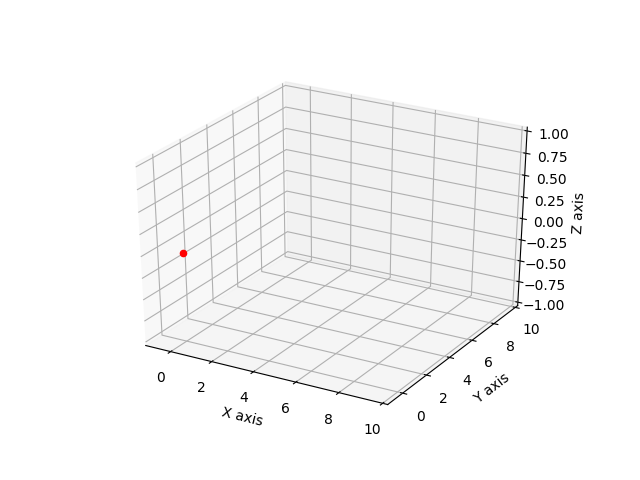

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


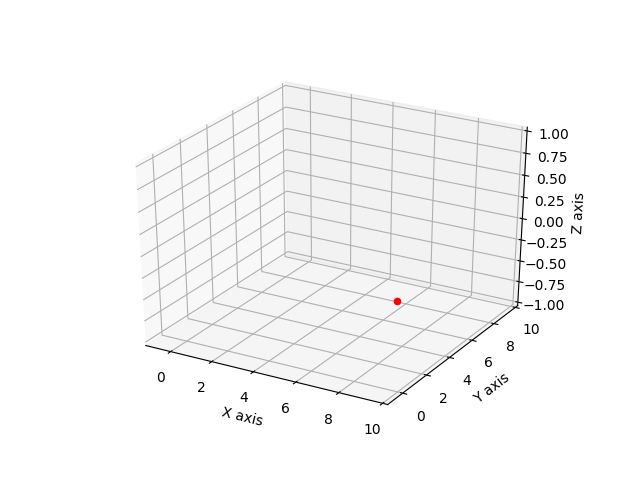

shape = 3
simulation started
stage one charges and currents
grid simulated in 1.7779827117919922 seconds



<IPython.core.display.Javascript object>


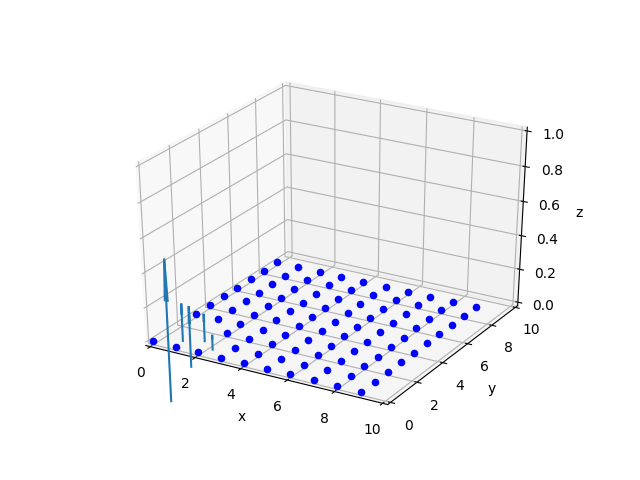

The acutal time is 6.72e-09


<IPython.core.display.Javascript object>


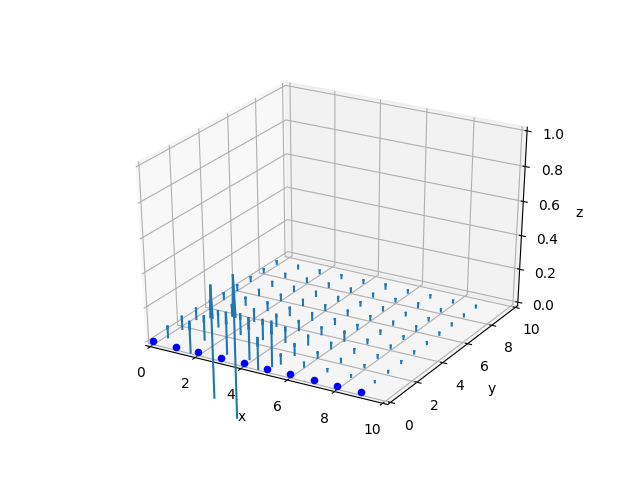

The acutal time is 9.072e-08
[0.+0.j 0.+0.j 0.+0.j]
E field specs
test pass count = 90
test fail count = 4
points of failure
[8, 27, 74, 93]

H field specs
test pass count = 90
test fail count = 4
points of failure
[8, 27, 74, 93]


In [15]:
test_charge_3()

In [16]:
def test_charge_4():
    time_steps = 150
    delta = [1, 1, 1]
    delta_t = 3.36 * 10**-9
    
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    r = 2
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        location = r * np.array([np.cos( w * t), np.sin( w * t)]) + np.array([5, 5])
        mapping.modify_charge(0, t * delta_t, location=location) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=int(time_steps/5))
    jefimenko.plot_grid(mapping, time=int(2*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(3*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(4*time_steps/5))

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    jefimenko.simulate(mapping)

    for t in range (0, time_steps, int(time_steps / 5)):
        jefimenko.plot_EM_grid('H', mapping, time=t)
    

    print(mapping.grid['E'][time_steps - 1][5, 5])

    for t in range(time_steps - 2):
        
        t_0 = int(np.rint(t + (r / C_0)/delta_t))
        R_0 = - r * np.array([np.cos(w * t), np.sin(w * t), 0])
        v = w * r
        V_0 = v**2 / r**2 * r * np.array([- np.sin(w * t), np.cos(w * t), 0]) 
    
        test_array_E = (q / (4 * np.pi * E_0 * r**3) * (((1 - v**2 / C_0**2) *
                                                   np.cos(v/C_0) +
                                                   (v / C_0) * np.sin(v / C_0)) * R_0 +
                                                   ((1 - v **2 / C_0**2) * (r / v) *
                                                    np.sin(v / C_0) - r / C_0 *
                                                    np.cos(v / C_0)) * V_0))

        test_array_H = (q / (4 * np.pi * r**3) * v * r * np.array([0, 0, 1]))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E      = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location.append(t)
            print('note test array directly calculated from E test array')
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failer')
    print(test_fail_location)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failer')
    print(test_fail_location)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

this is the grid layout


<IPython.core.display.Javascript object>


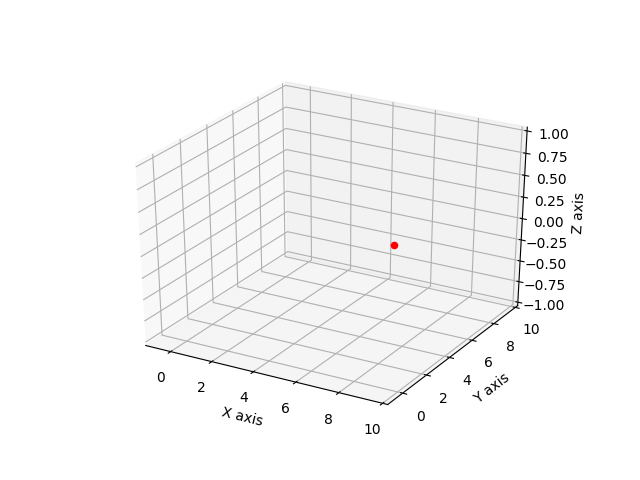

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


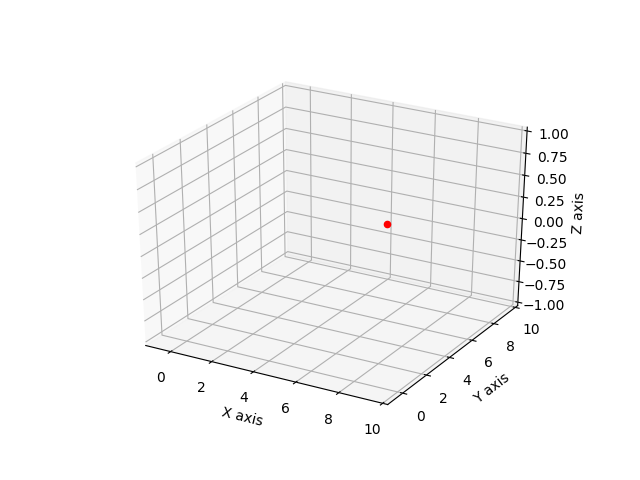

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


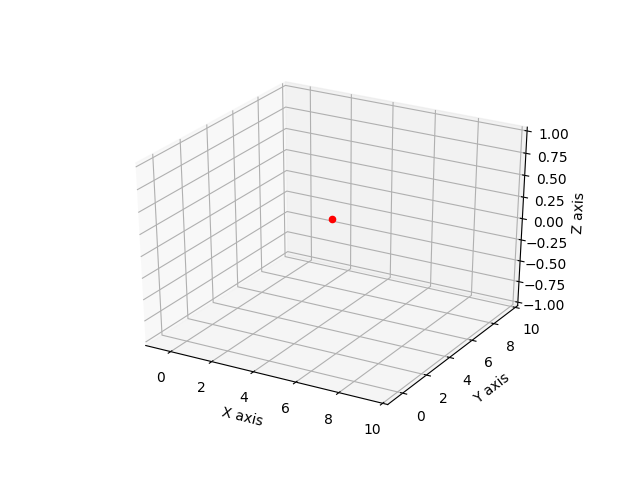

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


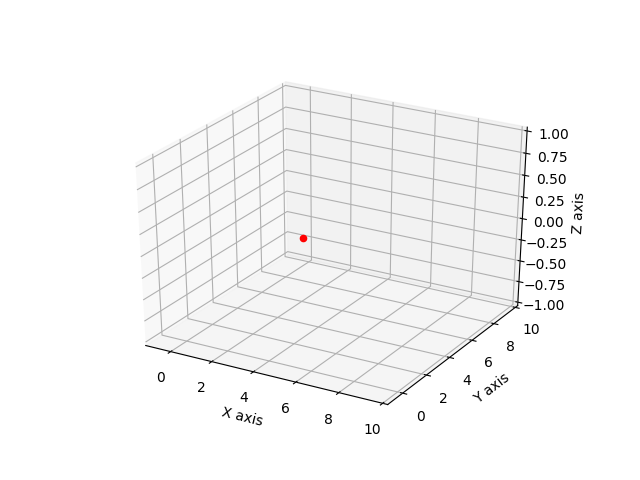

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


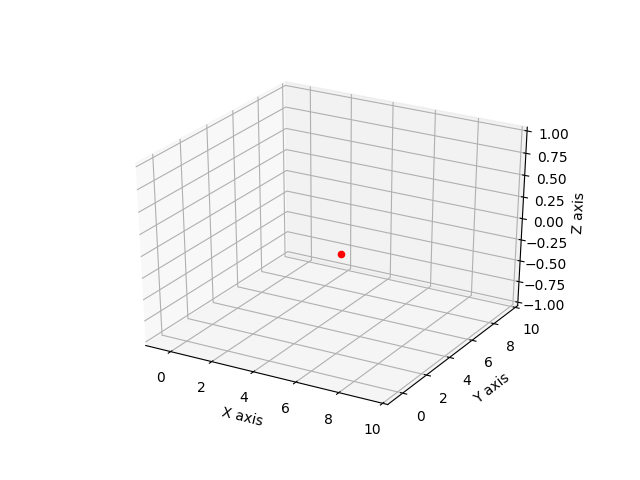

shape = 3
simulation started
stage one charges and currents
grid simulated in 3.33844256401062 seconds



<IPython.core.display.Javascript object>


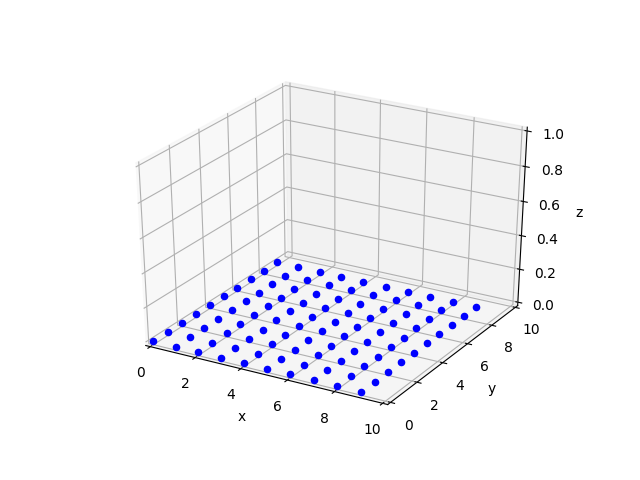

The acutal time is 0.0


<IPython.core.display.Javascript object>


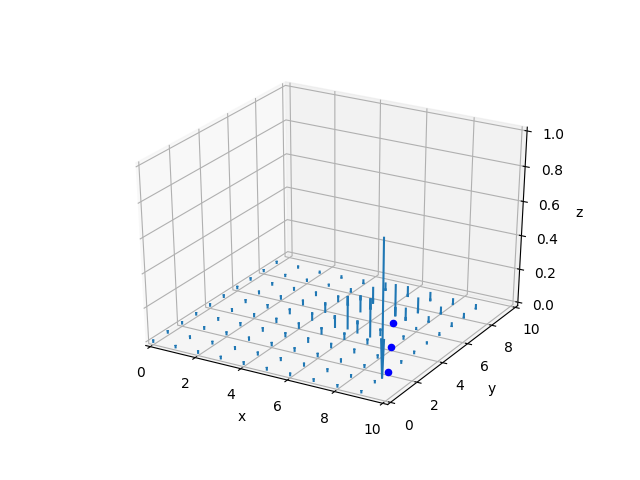

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>


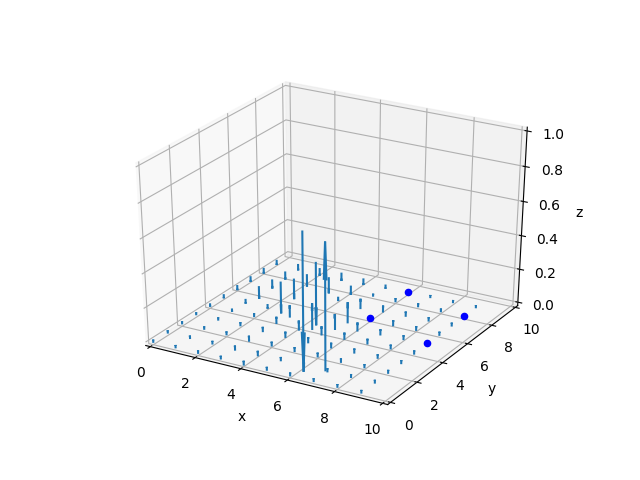

The acutal time is 2.016e-07


<IPython.core.display.Javascript object>


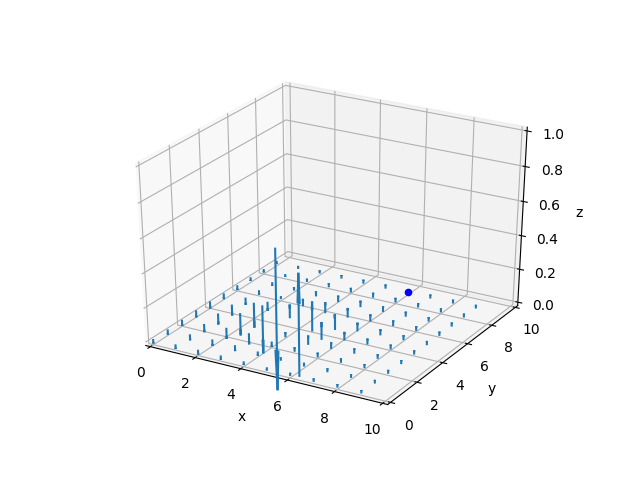

The acutal time is 3.024e-07


<IPython.core.display.Javascript object>


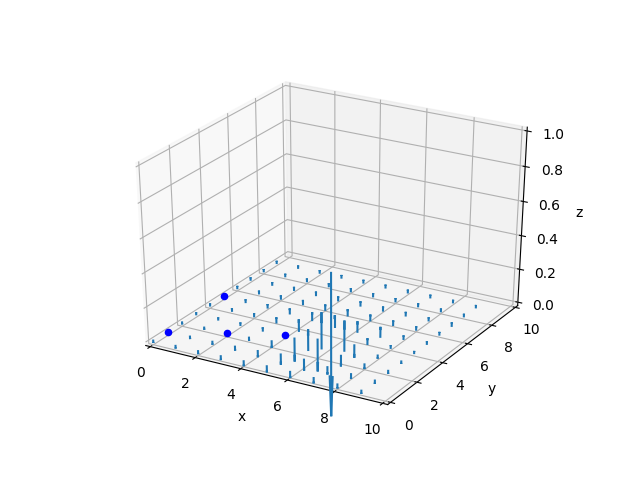

The acutal time is 4.032e-07
[[-2.24480659e+09+0.j  2.83585021e+08+0.j  0.00000000e+00+0.j]]
E field specs
test pass count = 148
test fail count = 0
points of failer
[]

H field specs
test pass count = 148
test fail count = 0
points of failer
[]
NOTHING NEEDS FIXED


In [17]:
test_charge_4()

In [18]:
def test_current_5():
    delta = .1
    mapping = jefimenko.Grid(delta=[1 * delta, 1 * delta, 1 * delta],  # this is the size of a step in x, y and z
                size=[11 * delta, 2 * delta, 2 * delta],  # this is the size of the grid in meters
                time=11 * 3.36 * 10**-9  * delta,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9 * delta  # this is the size of a full time step
        )
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)

    # jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)


    #print(' The H field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('H', mapping, time=t)
 
    #print(' The E field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][10][0][0] - test_array) /
                   (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][-1][10][0][0])
        print('target is')
        print(test_array)
        print('')

    test_array = [0, 2*10**-6, 0]
    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][1][0][0] - test_array) /
                   (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print(U_0 * mapping.grid['H'][-1][10][0][0])   
        print('target is')
        print(test_array)
        print('')

In [19]:
test_current_5()

amps = 1.0
direction = [0. 0. 1.]
location = [0. 0. 0.]

simulation started
stage one charges and currents
grid simulated in 0.059736013412475586 seconds

time == 0 PASS
time == 1 R == 1 PASS
time == 2 R == 2 PASS


In [20]:
#  this is just a quick test of a static boundary
# more is needed including a incoming wave

def test_boundary_1():
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
 
    #count = mapping.Add_Charge([0], Q = 1, charge_count=True)
    for i in range(10):
        mapping.Add_Boundary(i, [0,0,0], E = [1, 0, 0], H = [0, 0, 0])
 
    
    
   # print("charge_count is " + str(count))
    # jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 R == 1 E field PASS")
    else:
        print("time = 0 R == 1 E field FAIL")

    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 R == 1 H field PASS")
    else:
        print("time == 0 R == 1 H field FAIL")

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1][0][0] - test_array < .01).all():
        percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
        print("time == 1 R == 1 E filed PASS")
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        print("time == 0 R == 1 E field FAIL")   

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2][0][0] - test_array < .01).all():
        print("time == 1 R == 2 E field PASS")
    else:
        print("time == 1 R == 2 E field FAIL")
        print(mapping.grid['E'][1][2][0][0])
        
    if(mapping.grid['H'][1][1][0][0] == [0, 0, 0]).all():
        print("time == 1 R == 1 H field PASS")
    else:
        print("time == 1 R == 1 H field FAIL")

In [21]:
test_boundary_1()  # a static boundary

simulation started
stage one charges and currents
grid simulated in 0.02718043327331543 seconds

time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 E filed PASS
time == 1 R == 2 E field PASS
time == 1 R == 1 H field PASS


In [22]:
# a dynamic boundary goes here
''' befor i can exspect to do a dynamic boundary I need to devolep a regions calculator'''

' befor i can exspect to do a dynamic boundary I need to devolep a regions calculator'

In [23]:
def test_dipole_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                             size=[7, 7, 1],  # this is the size of the grid in meters
                             time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9  # this is the size of a full time step
                            )

    count = mapping.Add_Dipole([3, 3, 0], Q = 1, dipole_vector = [1, 0, 0], separation = .01, count=True, print_all=print_all)
    #count = mapping.Add_Dipole([3, 3, 3], Q = 0, dipole_vector = [1, 1, 1], separation = 1, count=True)
    #mapping.Modify_Dipole(N=count, location=[3,3,0], Q=1, dipole_vector=[1, 0, 0], separation=.01,time=0, print_all=True)
    
    if(print_all == True):
        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    dipole_moment = np.array([1, 0, 0]) * 1 * .01

    H_pass_count = 0
    H_fail_count = 0
    for k in range(len( mapping.grid['H'][0] )):
        for j in range(len( mapping.grid['H'][0][1] )):
            for i in range(len( mapping.grid['H'][0][1][0] )):
                if(mapping.grid['H'][-1][k][j][i] == [0,0,0]).all():
                    H_pass_count = H_pass_count + 1
                else:
                    H_fail_count = H_fail_count + 1

    E_pass_count = 0
    E_fail_count = 0
    for k in range(len( mapping.grid['E'][0] )):
        for j in range(len( mapping.grid['E'][0][1] )):
            for i in range(len( mapping.grid['E'][0][1][0] )):

                R = np.array([3, 3, 0]) - np.array([k, j, i])
                r = np.linalg.norm(R)

                #print('acual result')
                #print(mapping.grid['E'][-1][k][j][i] )
                #print('test_valu')
                #print(dipole_field(r, R, dipole_moment))
                #print('test')
                #print(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment))

                if np.linalg.norm(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment)) < np.linalg.norm(mapping.grid['E'][-1][k][j][i] * .01):
                      E_pass_count = E_pass_count + 1
                elif [k,j,i] != [3, 3, 0]:  # note that [3,3,0] has been left out since it is the location of the dipole
                    E_fail_count = E_fail_count + 1
                    if(print_all == True):
                        print(str(k) + ',' + str(j) + ',' + str(i)  )

    if(print_all == True):
        print('H_pass_count')
        print(H_pass_count)
        print('H_fail_count')
        print(H_fail_count)
        
        print('E_pass_count')
        print(E_pass_count)
        print('E_fail_count')
        print(E_fail_count)
        
    return([E_pass_count, E_fail_count, H_pass_count, H_fail_count])

def dipole_field(r, R, dipole_moment):
    E_0 = (4 * np.pi * 8.9875517873681764 * 10**9 )**-1
    scale = 1 / (4 * np.pi * E_0)
    first_term = ((3 * np.dot(dipole_moment, R)) * R) / r**5
                    
    last_term = dipole_moment / r**3
    #pdb.set_trace()
    
    return(scale * (first_term - last_term))
                    


In [24]:
def test_dipole_2(print_all=False):

    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                             size=[7, 7, 1],  # this is the size of the grid in meters
                             time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                             delta_t=3.36 * 10**-9  # this is the size of a full time step
                            )

    #count = mapping.Add_Dipole([3, 3, 0], Q = 1, dipole_vector = [1, 0, 0], separation = .01, count=True, print_all=true)
    count = mapping.Add_Dipole([3, 3, 3], Q = 0, dipole_vector = [1, 1, 1], separation = 1, count=True, print_all=print_all)

    if print_all is True:
        print('moddifying dipole')
        print()
    mapping.Modify_Dipole(N=count, location=[3,3,0], Q=1, dipole_vector=[1, 0, 0], separation=.01,time=0, print_all=print_all)
    
    if(print_all == True):
        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    dipole_moment = np.array([1, 0, 0]) * 1 * .01

    H_pass_count = 0
    H_fail_count = 0
    for k in range(len( mapping.grid['H'][0] )):
        for j in range(len( mapping.grid['H'][0][1] )):
            for i in range(len( mapping.grid['H'][0][1][0] )):
                if(mapping.grid['H'][-1][k][j][i] == [0,0,0]).all():
                    H_pass_count = H_pass_count + 1
                else:
                    H_fail_count = H_fail_count + 1

    E_pass_count = 0
    E_fail_count = 0
    for k in range(len( mapping.grid['E'][0] )):
        for j in range(len( mapping.grid['E'][0][1] )):
            for i in range(len( mapping.grid['E'][0][1][0] )):

                R = np.array([3, 3, 0]) - np.array([k, j, i])
                r = np.linalg.norm(R)

                
                if(print_all == True):
                    print()
                    print('acual result = ' + str(mapping.grid['E'][-1][k][j][i] ))
                    print('target valu  = ' + str((dipole_field(r, R, dipole_moment))))
                    print('test')
                    print(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment))

                if np.linalg.norm(mapping.grid['E'][-1][k][j][i] - dipole_field(r, R, dipole_moment)) < np.linalg.norm(mapping.grid['E'][-1][k][j][i] * .01):
                      E_pass_count = E_pass_count + 1
                elif [k,j,i] != [3, 3, 0]:  # note that [3,3,0] has been left out since it is the location of the dipole
                    E_fail_count = E_fail_count + 1
                    if(print_all == True):
                        print(str(k) + ',' + str(j) + ',' + str(i)  )

    if(print_all == True):
        print('H_pass_count')
        print(H_pass_count)
        print('H_fail_count')
        print(H_fail_count)

        print('E_pass_count')
        print(E_pass_count)
        print('E_fail_count')
        print(E_fail_count)

    return([E_pass_count, E_fail_count, H_pass_count, H_fail_count])

def dipole_field(r, R, dipole_moment):
    E_0 = (4 * np.pi * 8.9875517873681764 * 10**9 )**-1
    scale = 1 / (4 * np.pi * E_0)
    first_term = ((3 * np.dot(dipole_moment, R)) * R) / r**5
                    
    last_term = dipole_moment / r**3
    #pdb.set_trace()
    
    return(scale * (first_term - last_term))
                    


In [25]:
def charged_Permittivity_ball():  # this is example 8.7-1 page 251-252
    time = 10
    delta_t=3.36 * 10**-9
    delta = 1
    a = int(7)
    b = int(7)
    c = int(7)
    
    pass_count = 0
    fail_count = 0
    
    mapping = jefimenko.Grid(delta=[delta, delta, delta],  # this is the size of a step in x, y and z
                size=[a * delta, b * delta, c * delta],  # this is the size of the grid in meters
                time=time * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
                free_space = False)

    Q = 1
    a = 3
    
    mapping.Add_Charge([3 ,3 ,3 ],
                       Q=Q)

    C = 299892458
    K_e = 8.9875517872681764 * 10 ** 9
    E_0 = (4 * np.pi * K_e) ** -1
    U_0 = (C ** 2 * E_0) ** -1
    E_1 = 2

    mapping.add_Permittivity([3, 3, 3], permittivity = E_1)

    jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    jefimenko.simulate(mapping, induction = False)

    # jefimenko.plot_EM_grid('E', mapping, time=time-1)

    #for t in range(time):
    #    print(' E field ' + str(t))
    #    jefimenko.plot_EM_grid('E', mapping, time=t)
        # print(' P_E field ' + str(t))
        # jefimenko.plot_EM_grid('P_E', mapping, time=t)

    a = .5 * delta

    for i in np.ndindex(tuple([5, 5, 5])):

        R = np.array(i) - np.array([3, 3, 3])
        r = np.linalg.norm(R)
        
        if r != 0:
            E_V = Q * R / (4 * np.pi * E_0 * r ** 3)

            E_P = -(E_1 - 1) * Q * R / (4 * np.pi * E_0 * E_1 * r**3)
        else:
            E_V = 0
            E_P = 0
        
        E = E_V + E_P
        
        if np.linalg.norm(1 - (np.linalg.norm(E) / np.linalg.norm(mapping.grid['E'][-1][i])) < .01):
        #if (E == mapping.grid['E'][-1][i]).all():
            pass_count += 1
        elif (i !=(3, 3, 3)):
            fail_count += 1
            print('fail')
            print(i)
        
        # print('raw electric field is')
        # print(E)
        
       # print('location')
       # print(i)
       # print('radius')
       # print(R)
       # print('target valu')
       # print(E)
       # 
       # print('target without dielectric')
       # print(E_V)
       # print('effect of dielectric')
       # print(E_P)
       # 
       # print('acual valu')
       # print(mapping.grid['E'][-1][i])
       # print('polarization field')
       # # print(mapping.grid['P'][-1][i])
       # 
       # print()
       # # print('total polorization efect')
       # # print(mapping.grid['P_E'][-1][:][0][0])
    
    #print('Pass Count')
    #print(pass_count)
    #print('Fail Count')
    #print(fail_count)


    # return(mapping)
    return(pass_count, fail_count)

In [26]:
score = constant_field()
print(score)

print('E field pass count is ' + str(score[0]))
print('E field fail count is ' + str(score[1]))
print('H field pass count is ' + str(score[2]))
print('H field fail count is ' + str(score[3]))

simulation started
stage one charges and currents
grid simulated in 0.0028128623962402344 seconds

[24, 0, 24, 0]
E field pass count is 24
E field fail count is 0
H field pass count is 24
H field fail count is 0


In [27]:
%time
%memit score = test_current_1(print_all = False)
#grid simulated in 0.006738424301147461 seconds without cython

print('H pass score = ' + str(score[0]))
print('H fail score = ' + str(score[1]))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs
simulation started
stage one charges and currents
grid simulated in 0.004616498947143555 seconds

time == 2 R == 2 PASS
simulation started
stage one charges and currents
grid simulated in 0.004800081253051758 seconds

time == 2 R == 2 PASS
simulation started
stage one charges and currents
grid simulated in 0.004708051681518555 seconds

time == 2 R == 2 PASS
peak memory: 104.62 MiB, increment: 0.14 MiB
H pass score = 2
H fail score = 0


In [28]:
%%time

count = test_current_2(print_all=False)
# grid simulated in 0.41626501083374023 seconds without cython
print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


simulation started
stage one charges and currents
grid simulated in 0.25064659118652344 seconds

E pass count = 1225
E fail count = 0
H pass count = 1114
H fail count = 111
CPU times: user 340 ms, sys: 11.9 ms, total: 352 ms
Wall time: 345 ms


In [29]:
%%time

count = test_current_3(print_all=False)
# grid simulated in 0.43078160285949707 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))

#test_current_3()

 grid size is [51, 1.0, 1.0]
recommended to give all three measurements
simulation started
stage one charges and currents
grid simulated in 0.25260424613952637 seconds

E pass count = 1225
E fail count = 0
H pass count = 1114
H fail count = 111
CPU times: user 363 ms, sys: 8.03 ms, total: 371 ms
Wall time: 361 ms


In [30]:
%%time

# %prun count, charge_1 = test_charge_1(print_all=False)
%memit count, charge_1 = test_charge_1(print_all=False)
# grid simulated in 0.033782958984375 seconds without cython

#%mprun -f test_charge_1 count, charge_1 = test_charge_1(print_all=False)
#count, charge_1 = test_charge_1(print_all=False)
print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


simulation started
stage one charges and currents
grid simulated in 0.013182640075683594 seconds

simulation started
stage one charges and currents
grid simulated in 0.015200614929199219 seconds

simulation started
stage one charges and currents
grid simulated in 0.015790939331054688 seconds

peak memory: 104.62 MiB, increment: 0.00 MiB
E pass count = 3
E fail count = 0
H pass count = 2
H fail count = 0
CPU times: user 111 ms, sys: 9.69 ms, total: 120 ms
Wall time: 225 ms


In [31]:
%%time
print('test_dipole_1')
%memit count = test_dipole_1(print_all = False)
# grid simulated in 0.37735438346862793 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))

test_dipole_1
simulation started
stage one charges and currents
grid simulated in 0.11080741882324219 seconds



/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


simulation started
stage one charges and currents
grid simulated in 0.1079716682434082 seconds

peak memory: 104.66 MiB, increment: 0.01 MiB
E pass count = 48
E fail count = 0
H pass count = 49
H fail count = 0
CPU times: user 286 ms, sys: 30.8 ms, total: 317 ms
Wall time: 411 ms


In [32]:
%%time
print('test_dipole_2')
%memit
%lprun count = test_dipole_2(print_all = False)
# grid simulated in 0.34521913528442383 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

print('H pass count = ' + str(count[2]))
print('H fail count = ' + str(count[3]))


test_dipole_2
peak memory: 104.66 MiB, increment: 0.00 MiB
simulation started
stage one charges and currents
grid simulated in 0.13067269325256348 seconds

E pass count = 48
E fail count = 0
H pass count = 49
H fail count = 0
CPU times: user 220 ms, sys: 23.8 ms, total: 244 ms
Wall time: 357 ms


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide
/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


this is the grid layout


<IPython.core.display.Javascript object>


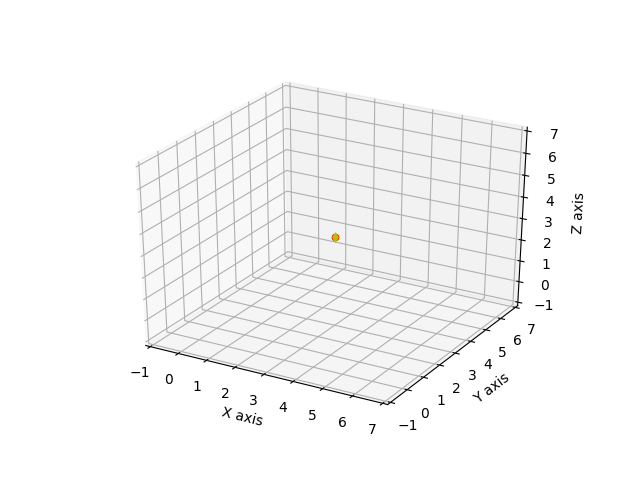

shape = 3
simulation started
stage one charges and currents
stage two permittivity.0


/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/polarization.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  r, R, delta))
/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/polarization.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  r, R, delta))


grid simulated in 61.2527277469635 seconds

E pass count = 124
E fail count = 0


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


In [33]:
#%timeit

#%memit

#%lprun -f jefimenko.simulate count = charged_Permittivity_ball()
%lprun -f jefimenko.charge_current_integrals.field_calculator count = charged_Permittivity_ball()
# grid simulated in 42.17354416847229 seconds without cython

print('E pass count = ' + str(count[0]))
print('E fail count = ' + str(count[1]))

#print('H pass count = ' + str(count[2]))
#print('H fail count = ' + str(count[3]))


In [34]:
def test_charge_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
        )
    pass_count_E = 0
    pass_count_H = 0
    fail_count_E  = 0
    fail_count_H  = 0
 

    count = mapping.Add_Charge([0], Q = 1, count=True)
    
    if print_all is True:
        print("charge_count is " + str(count))

        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time = 0 R == 1 E field FAIL")
        fail_count_E = fail_count_E + 1

    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 H field FAIL")
        fail_count_H = Fail_count_H + 1

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1][0][0] - test_array < .01).all():
        if print_all == True:
            percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
            print("time == 1 R == 1 E filed PASS")
        pass_count_E = pass_count_E + 1
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        if print_all == True:
            print("time == 0 R == 1 E field FAIL")   
        fail_count_E = fail_count_E + 1

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2][0][0] - test_array < .01).all():
        if print_all == True:
            print("time == 1 R == 2 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 1 R == 2 E field FAIL")
            print(mapping.grid['E'][1][2][0][0])
        fail_count_E = fail_count_E + 1
        
    if(mapping.grid['H'][1][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 1 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 1 R == 1 H field FAIL")
        fail_count_H = fail_count_H + 1
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)
    
    return([pass_count_E, fail_count_E, pass_count_H, fail_count_H], mapping)


charge_count is 0
this is the grid layout


<IPython.core.display.Javascript object>


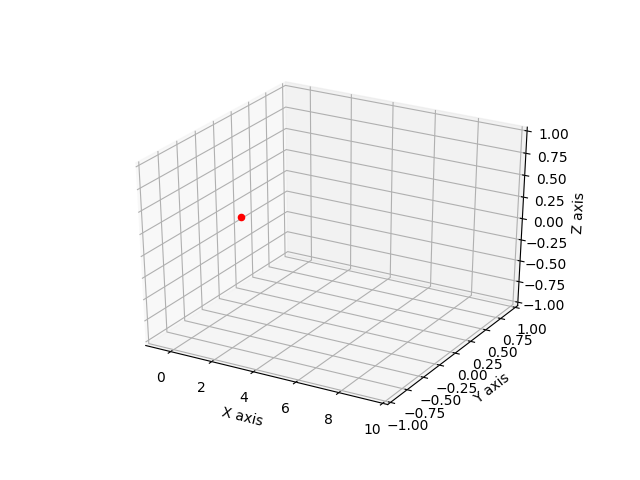

shape = 3
simulation started
stage one charges and currents
grid simulated in 0.012065410614013672 seconds

time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 E filed PASS
time == 1 R == 2 E field PASS
time == 1 R == 1 H field PASS
([3, 0, 2, 0], <jefimenko.classes.Grid object at 0x7fe2d393c668>)


In [35]:
print(test_charge_1(print_all = True))

In [36]:
def plasma_constant_E(print_all=False):
    time_L = 16
    delta_t = 1
    E_field = [1, 0, 0]
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=E_field,
                constant_H=[0,0,0]
        )
    pass_count = 0
    fail_count = 0
    
    charge = .00001
    velocity = np.array([0,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    E_field = np.array(E_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        test_valu = (1 / 2) * charge * E_field * (t * delta_t)**2
        if print_all == 1:
            print(t)
            print("location")
            print(mapping.charges[t][0].location)
            print("test location")
            print(test_valu)
            print()

        if ((mapping.charges[t][0].location <= test_valu + mapping.charges[t][0].location*.001).all() and 
            (mapping.charges[t][0].location >= test_valu - mapping.charges[t][0].location*.001).all()):
            pass_count += 1
        else:
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [37]:
plasma_constant_E()

grid simulated in 0.01768183708190918 seconds

pass count is 16
fail count is 0


In [38]:
def plasma_constant_H(print_all=False):
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,B_z]
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all == 1:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print(np.abs(test_valu) * .1 )
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [39]:
plasma_constant_H()

grid simulated in 0.11861205101013184 seconds

pass count is 99
fail count is 1


In [40]:
def plasma_constant_E_function(print_all=False):
    time_L = 16
    delta_t = 1
    E_field = lambda location, time: [1, 0, 0]
#    E_field = [1, 0, 0]
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=E_field,
                constant_H=[0,0,0]
        )
    pass_count = 0
    fail_count = 0
    
    charge = .00001
    velocity = np.array([0,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    E_field = np.array(E_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        test_valu = (1 / 2) * charge * np.array([1,0,0]) * (t * delta_t)**2
        if print_all == 1:
            print(t)
            print("location")
            print(mapping.charges[t][0].location)
            print("test location")
            print(test_valu)
            print()

        if ((mapping.charges[t][0].location <= test_valu + mapping.charges[t][0].location*.001).all() and 
            (mapping.charges[t][0].location >= test_valu - mapping.charges[t][0].location*.001).all()):
            pass_count += 1
        else:
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [41]:
plasma_constant_E_function()

grid simulated in 0.016363859176635742 seconds

pass count is 16
fail count is 0


/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/plasma.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  grid.charges[time][n].acceleration = acceleration.astype(float)
/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/plasma.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  grid.charges[time+1][n].velocity = velocity.astype(float)


In [42]:
#pdb.pm()

In [45]:
def plasma_constant_H_function(print_all=False):
    H_field = lambda location, time: [0, 0, 1]
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=H_field
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all is True:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print('error from test valu')
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            print('Fail at time ' + str(t))
            fail_count += 1

    print()
    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))

In [46]:
plasma_constant_H_function(print_all = False)

grid simulated in 0.10581588745117188 seconds

Fail at time 50

pass count is 99
fail count is 1
